In [50]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn
from google.colab import drive
drive.mount("/content/drive")       

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **Считываем данные**

In [51]:
url = "/content/drive/My Drive/data/online_shoppers_intention.csv" 
data_raw = pd.read_csv(url)

In [52]:
data_raw.shape

(12330, 18)

In [53]:
data_raw.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [54]:
data_raw.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [55]:
data_raw.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [56]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Этот набор данных содержит сессии, связанные с поведением пользователей на веб-страницах онлайн-магазина. Каждая сессия принадлежит уникальному пользователю в течение одного года, чтобы избежать склонности к определенному событию, праздничному дню, профилю пользователя или периоду.

Для каждой сессии указано:

- *Administrative, Administrative Duration, Informational, Informational Duration, Product Related, Product Related Duration* - количество различных типов веб-страниц, посещенных пользователем в рамках одной сессии, и общее время, потраченное на каждую страницу.

*Bounce Rate, Exit Rate , Page Value* представляют собой показатели, измеряемые "Google Analytics" для каждой страницы e-commerce сайта.
- *Bounce Rate* - процент пользователей, которые заходят на сайт с текущей страницы, а затем уходят, не совершая никаких других запросов к серверу аналитики
- *Exit Rate* - процент всех просмотров страницы, которые были последними в сессии. 
- *Page Value* - среднее значение для веб-страницы, которую посетил пользователь перед завершением транзакции
- *Special Day* указывает на то, что время посещения сайта близко к какому-либо празднику. Значение этого атрибута определяется с учетом продолжительности времени между датой заказа и датой доставки
- *Operating system* - операционная система
- *Browser* - браузер
- *Region* - регион / местоположение
- *Traffic type* - тип трафика
- *Visitor type* - вернувшийся пользователь / новый пользователь
- *Weekend* - выходной день / не выходной день
- *Month* - месяц
- *Revenue* - совершит ли пользователь покупку

**Задача:** предсказать значение Revenue - совершит пользователь покупку или нет, по текущим данным



### **Обработка и визуализация данных**

Проверим есть ли прпущенные значения в датасете

In [57]:
data_raw.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Датасет содержит пропущенные значения, проверим их

In [58]:
df_filter = data_raw['Administrative'].isin (['NaN']) 
data_raw[df_filter]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


Все пропущенные значения содержатся в одних и тех же строках и значение Revenue для них = false. Возможно эти данные были получены от пользователей которые просто зашли на сайт и сразу же вышли и поэтому статистика не была получена. Разумно будет просто удалить строки с пропущенными значениями так как их не много

In [59]:
data = data_raw.dropna(axis=0).copy()
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Столбцы 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue' содержат категориальные значения. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [60]:
categorial_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in categorial_cols:
  data[col] = data[col].astype('category')
data.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

**Характеристики для числовых признаков** 

In [61]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Есть отрицательные значения в полях связанных с продолжительностью посещения той или иной страницы. 

In [62]:
print('Количество сессий с отрицательным значением Administrative_Duration = ',len(data.loc[data['Administrative_Duration'] < 0, 'Administrative_Duration']))
print('Количество сессий с отрицательным значением Informational_Duration = ',len(data.loc[data['Informational_Duration'] < 0, 'Informational_Duration']))
print('Количество сессий с отрицательным значением ProductRelated_Duration = ',len(data.loc[data['ProductRelated_Duration'] < 0, 'ProductRelated_Duration']))

Количество сессий с отрицательным значением Administrative_Duration =  33
Количество сессий с отрицательным значением Informational_Duration =  33
Количество сессий с отрицательным значением ProductRelated_Duration =  33


In [63]:
neg_filter = data_raw['Administrative_Duration'].isin ([-1]) 
data_raw[neg_filter]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
16,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False
21,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,3,1,3,Returning_Visitor,False,False
24,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,1,Returning_Visitor,True,False
49,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.6,Feb,2,2,3,2,Returning_Visitor,False,False
50,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False
64,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,3,Returning_Visitor,False,False
132,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


Записей не много и их наличие может быть ошибкой, поэтому можем удалить строки с некорректными значениями

In [64]:
data = data.loc[data['Administrative_Duration'] != -1, ]
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Характеристики для категориальных признаков**

In [65]:
data.describe(include=['category'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12283,12283,12283,12283,12283,12283,12283,12283
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3357,6578,7934,4765,3907,10504,9421,10375


**Матрица корреляции**


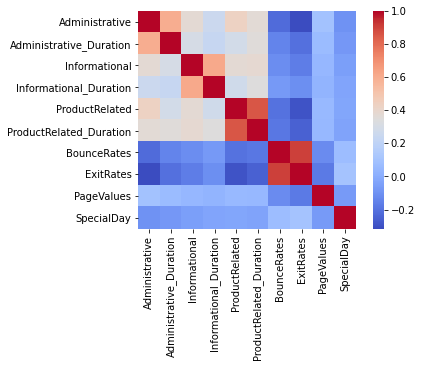

In [66]:
corr_mat = data.corr()
corr_mat
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [67]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

BounceRates     ExitRates                  0.911252
ProductRelated  ProductRelated_Duration    0.860711
Informational   Informational_Duration     0.618880
Administrative  Administrative_Duration    0.601171
dtype: float64

Обнаруживается сильная корреляция между *BounceRates* и *ExitRates*, а также между *ProductRelated* и *ProductRelated_Duration*. Между значениями *Informational* и *Informational_Duration*, *Administrative* и *Administrative_Duration* зависимость меньше, но она есть. Отсутствуют данные которые могли бы напрямую влиять на значение *Revenue*

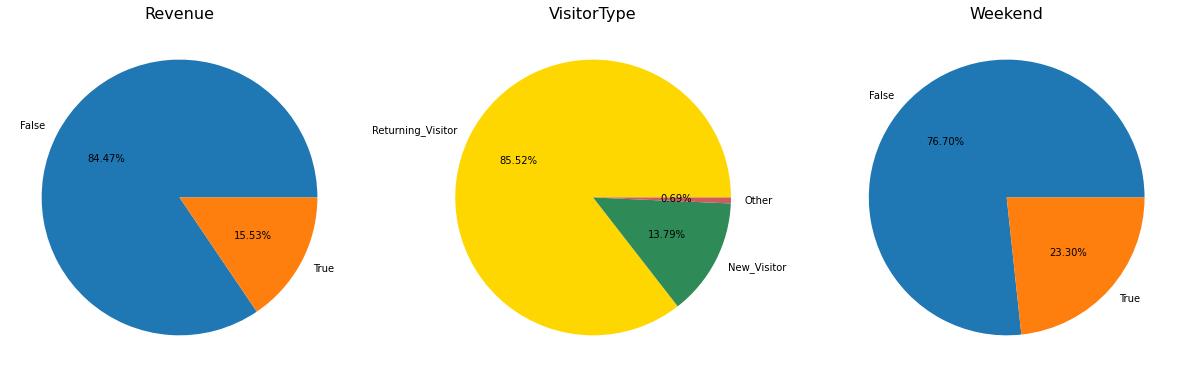

In [68]:
fig, ax = plt.subplots(1, 3, figsize = (21,12))
ax[0].pie(data['Revenue'].value_counts(), labels=data['Revenue'].unique(), autopct='%.2f%%')
ax[0].set_title("Revenue", fontsize=16)
ax[1].pie(data['VisitorType'].value_counts(),labels=data['VisitorType'].unique(), autopct='%.2f%%', colors=['gold','seagreen','indianred'])
ax[1].set_title("VisitorType", fontsize=16)
ax[2].pie(data['Weekend'].value_counts(), labels=data['Weekend'].unique(), autopct='%.2f%%')
ax[2].set_title("Weekend", fontsize=16)
pass

- Лишь 15.5% сессий приносят доход. 
- Среди посетителей большинство - это пользователи которые уже посещали сайт.
- Посещаймость сайта в выходные не увеличивается (Будни - это ~ 71% всей недели, выходные ~ 29%)

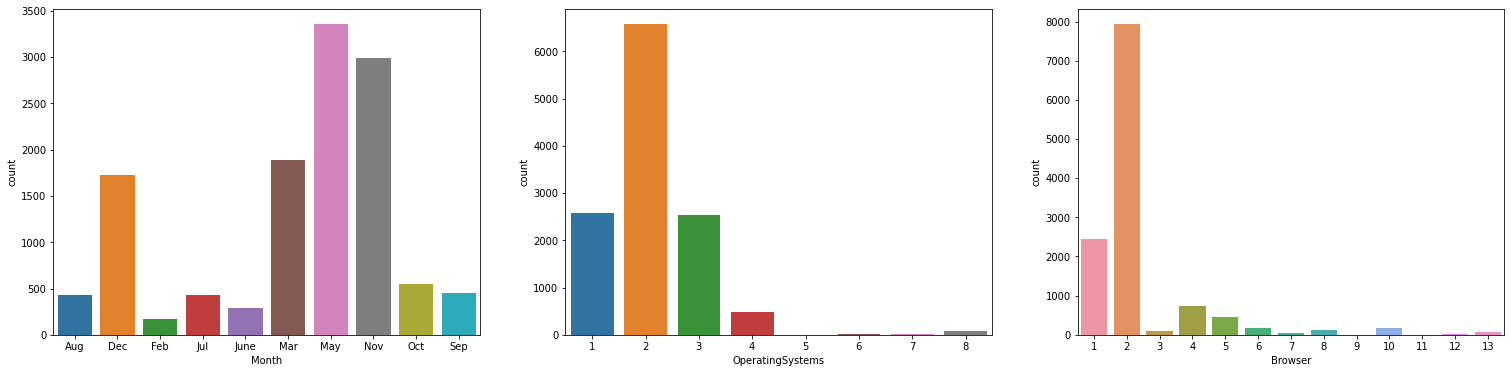

In [69]:
fig, ax = plt.subplots(1, 3, figsize = (26,6))
sns.countplot(x='Month', data=data, ax=ax[0])
sns.countplot(x='OperatingSystems', data=data, ax=ax[1])
sns.countplot(x='Browser', data=data, ax=ax[2])
pass

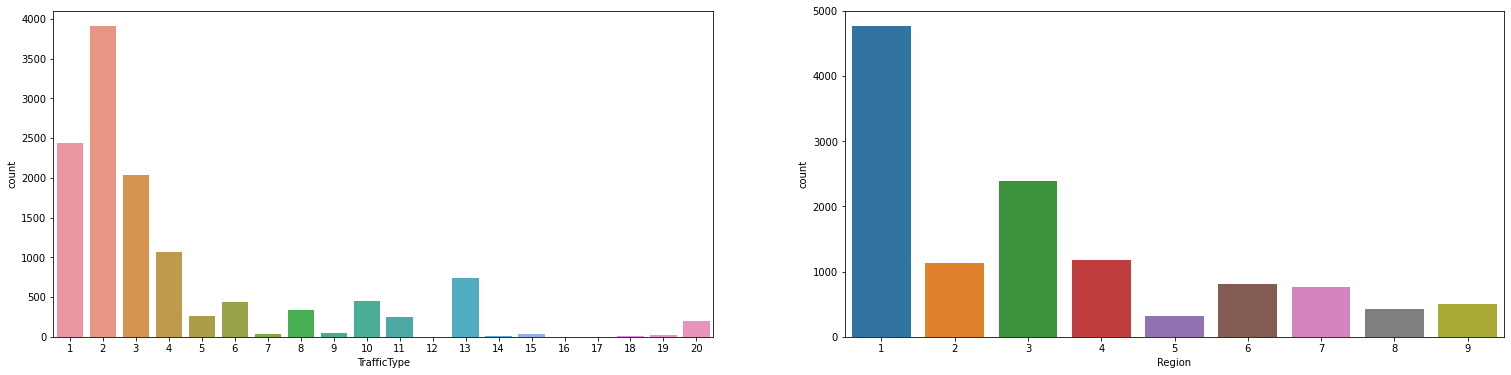

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (26,6))
sns.countplot(x='TrafficType',data=data, ax=ax[0])
sns.countplot(x='Region', data=data, ax=ax[1])
pass

- Больше всего посещений сайта зарегистрировано в Мае и Ноябре
- Наиболее часто используемая операционная система - #2
- Самый встречающийся тип трафика - #2
- Самое большое число сессий совершено из региона #1
- Сессии чаще совершаются из браузера #2

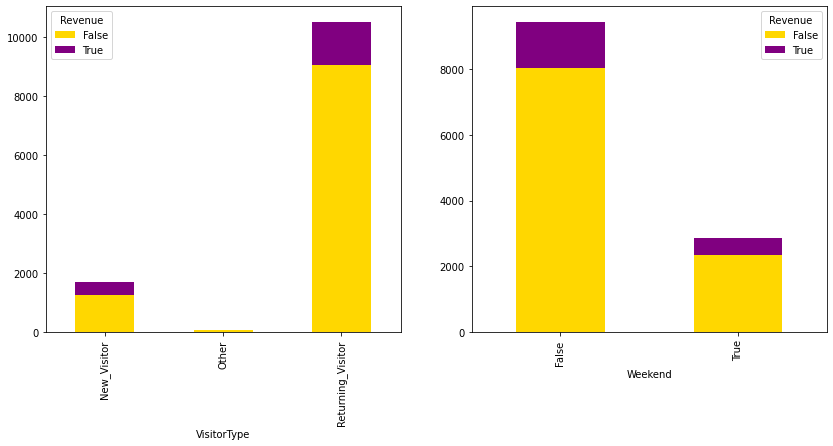

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))
pd.crosstab(data['VisitorType'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[0])
pd.crosstab(data['Weekend'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[1])
pass

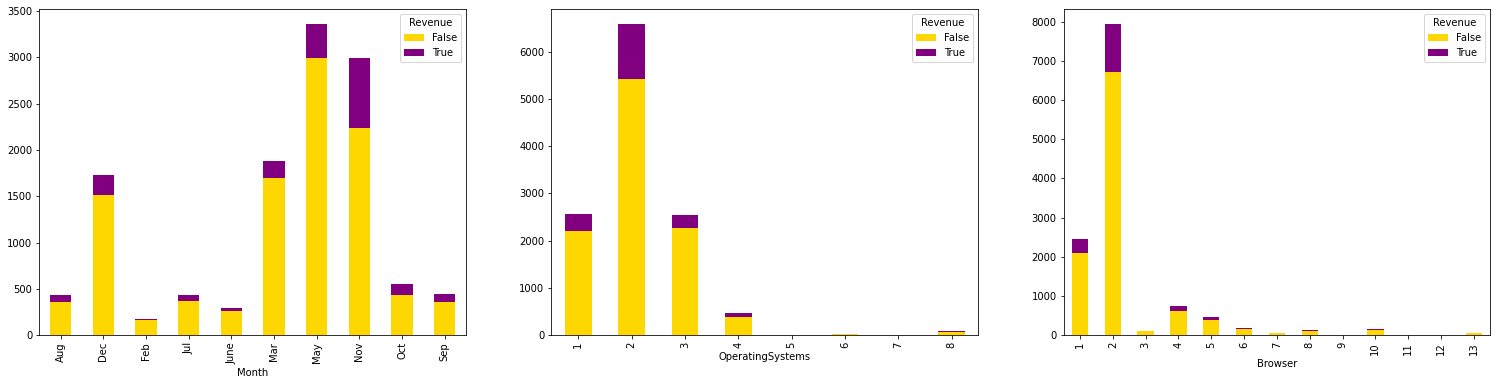

In [72]:
fig, ax = plt.subplots(1, 3, figsize = (26,6))
pd.crosstab(data['Month'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[0])
pd.crosstab(data['OperatingSystems'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[1])
pd.crosstab(data['Browser'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[2])
pass

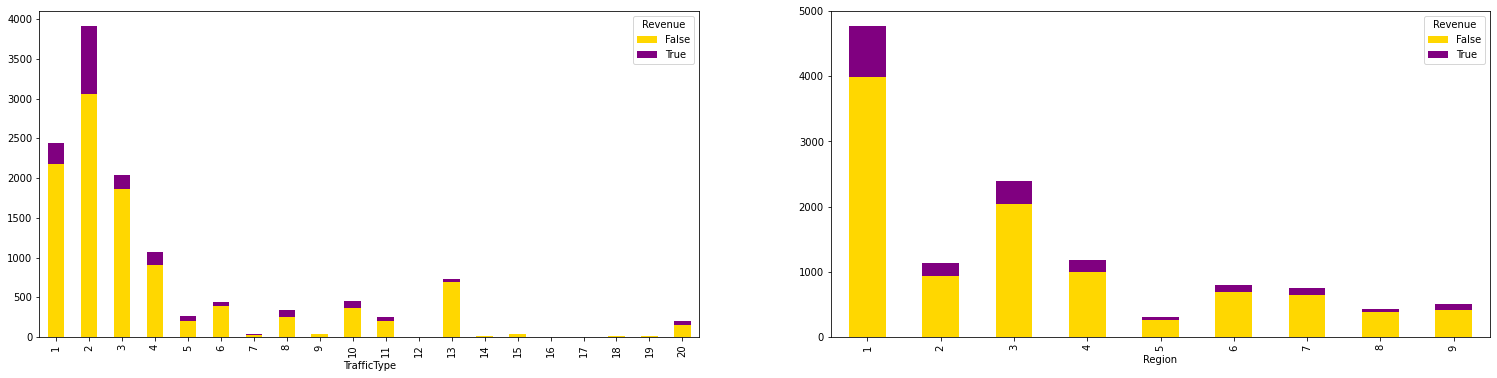

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (26,6))
pd.crosstab(data['TrafficType'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[0])
pd.crosstab(data['Region'], data['Revenue']).plot(kind='bar', stacked=True, color=['gold', 'purple'],ax=ax[1])
pass

Любопытно то, что несмотря на большее число посещений в мае - доход в ноябре значительно выше

**Диаграммы рассеивания**

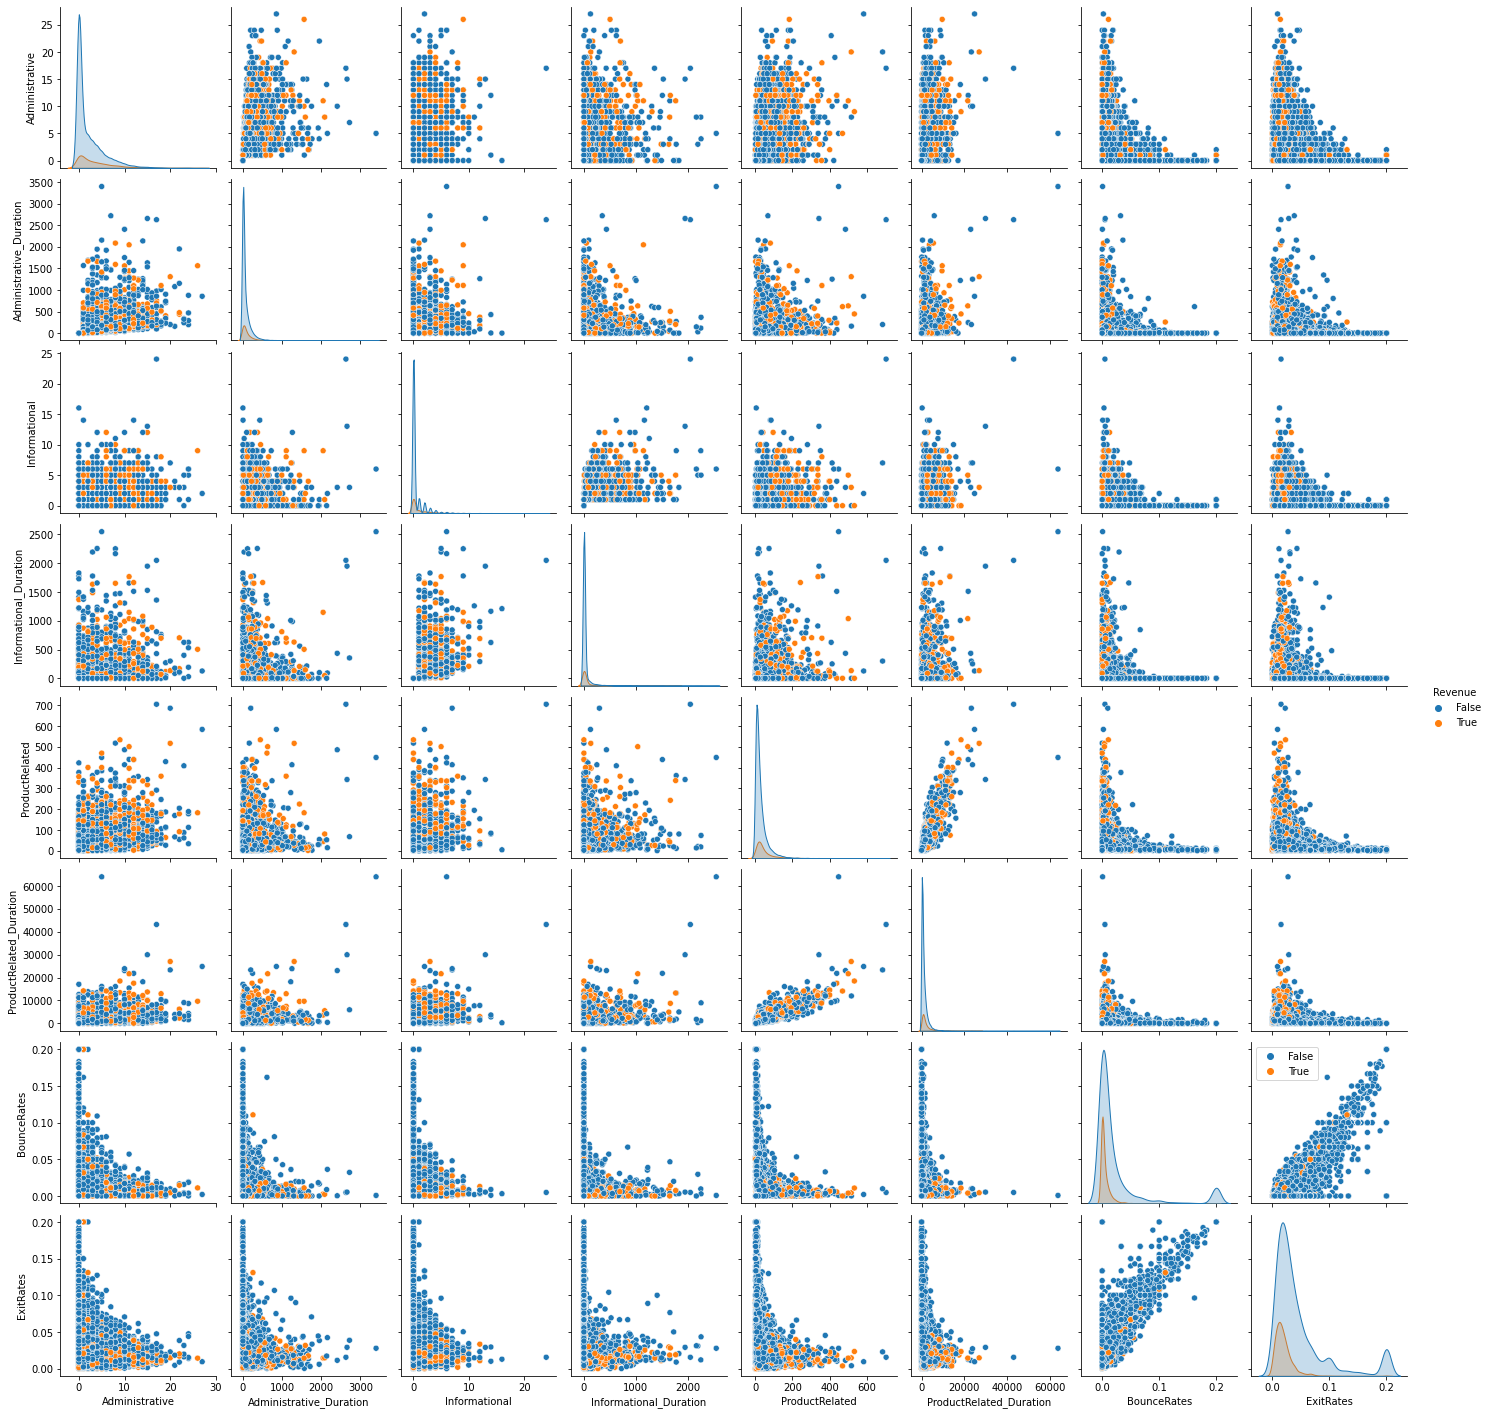

In [74]:
new_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Revenue']]
sns.pairplot(new_data, diag_kind='auto', hue='Revenue')
plt.legend()
pass

- Высокие показатели *Administrative_Duration*, *Informational_Duration*, *ProductRelated_Dutation* не приводят к получению дохода
- Между *ProductRelated* и *ProductRelated_Duration* существует линейная зависимость
- Между *ExitRates* и *BonunceRates* существует линейная зависимость
- Высокие показатели *ExitRates* и *BonunceRates* не приводят к получению дохода


### **Предобработка данных**

Нормализуем количественные признаки


In [97]:
num_vars = list(data.select_dtypes(exclude='category').columns)
cat_vars=list(data.select_dtypes('category').columns)
data_stand = data[num_vars]

data_stand = (data_stand - data_stand.mean(axis = 0))/data_stand.std(axis = 0)
data_stand.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04,1.228300e+04
mean,4.085057e-15,4.477928e-15,-8.698407e-15,4.769440e-15,-3.634830e-15,-1.367383e-15,7.076549e-15,1.617686e-14,1.957149e-16,-2.189935e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.988789e-01,-4.582190e-01,-3.972308e-01,-2.453983e-01,-7.153078e-01,-6.259360e-01,-4.555559e-01,-8.883936e-01,-3.178323e-01,-3.090182e-01
25%,-6.988789e-01,-4.582190e-01,-3.972308e-01,-2.453983e-01,-5.580802e-01,-5.282814e-01,-4.555559e-01,-5.905490e-01,-3.178323e-01,-3.090182e-01
50%,-3.981387e-01,-4.130332e-01,-3.972308e-01,-2.453983e-01,-3.110082e-01,-3.114683e-01,-3.910308e-01,-3.671655e-01,-3.178323e-01,-3.090182e-01
75%,5.040821e-01,7.243152e-02,-3.972308e-01,-2.453983e-01,1.382135e-01,1.417881e-01,-1.060450e-01,1.540626e-01,-3.178323e-01,-3.090182e-01
max,7.421108e+00,1.873868e+01,1.846864e+01,1.783496e+01,1.511976e+01,3.276429e+01,3.738574e+00,3.281431e+00,1.913147e+01,4.713039e+00


In [98]:
data_stand = pd.concat((data_stand, data[cat_vars]), axis = 1)
data_stand.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.698879,-0.458219,-0.397231,-0.245398,-0.692847,-0.625936,3.738574,3.281431,-0.317832,-0.309018,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.698879,-0.458219,-0.397231,-0.245398,-0.670386,-0.592532,-0.455556,1.196519,-0.317832,-0.309018,Feb,2,2,1,2,Returning_Visitor,False,False
3,-0.698879,-0.458219,-0.397231,-0.245398,-0.670386,-0.624544,0.592977,2.030484,-0.317832,-0.309018,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.698879,-0.458219,-0.397231,-0.245398,-0.490697,-0.298420,-0.036143,0.154063,-0.317832,-0.309018,Feb,3,3,1,4,Returning_Visitor,True,False
5,-0.698879,-0.458219,-0.397231,-0.245398,-0.288547,-0.545444,-0.124440,-0.376310,-0.317832,-0.309018,Feb,2,2,1,3,Returning_Visitor,False,False


Обработка категориальных признаков

In [99]:
cat_vars = cat_vars[:-1]
data_dummies = pd.get_dummies(data_stand, columns=cat_vars)
data_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.698879,-0.458219,-0.397231,-0.245398,-0.692847,-0.625936,3.738574,3.281431,-0.317832,-0.309018,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-0.698879,-0.458219,-0.397231,-0.245398,-0.670386,-0.592532,-0.455556,1.196519,-0.317832,-0.309018,False,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-0.698879,-0.458219,-0.397231,-0.245398,-0.670386,-0.624544,0.592977,2.030484,-0.317832,-0.309018,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,-0.698879,-0.458219,-0.397231,-0.245398,-0.490697,-0.298420,-0.036143,0.154063,-0.317832,-0.309018,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,-0.698879,-0.458219,-0.397231,-0.245398,-0.288547,-0.545444,-0.124440,-0.376310,-0.317832,-0.309018,False,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


### **Разбиение на обучающую и тестовую выборки**

In [100]:
x = data_dummies
x = x.drop(['Revenue'], axis=1)
y = data['Revenue']
y = y.astype(int)
print("x shape:", x.shape)
print("y shape:", y.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x shape: (12283, 75)
y shape: (12283,)
x_train shape : (8598, 75)
y_train shape : (8598,)
x_test shape: (3685, 75)
y_test shape: (3685,)


### **kNN**

Запустим классификатор ближайших соседей, попробуем разное их количество и сравним ошибки

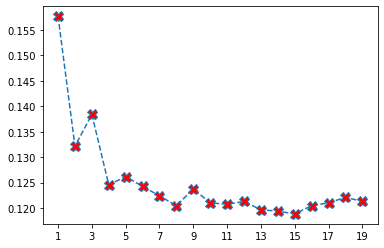

In [118]:
from sklearn.neighbors import KNeighborsClassifier
#error_rate = []
#for i in range(1, 20):
    #knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_k = knn.predict(x_test)
    #error_rate.append(np.mean(pred_k != y_test))
plt.xticks(range(1,20,2),range(1,20,2))
plt.plot(range(1,20), error_rate, marker='X', linestyle='dashed', markerfacecolor='red', markersize=10)
pass


Из графика видно что наименьшее значение ошибки наблюдается при параметре равном 15. Сравним более подробно при значениях k = 1, 2, 14, 15



In [107]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))


Train accuracy : 1.0
Test accuracy : 0.8423337856173677


In [108]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.91428239125378
Test accuracy : 0.867842605156038


In [119]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))


Train accuracy : 0.8831123517096999
Test accuracy : 0.8805970149253731


In [106]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.8842754128867178
Test accuracy : 0.8811397557666214


###**Random Forest**

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
print("Train accuracy :", rfc.score(x_train, y_train))
print("Test accuracy :", rfc.score(x_test, y_test))


Train accuracy : 1.0
Test accuracy : 0.8968792401628223


Посмотрим какие признаки по мнению классификатора являются наиболее важными. Так как линейной зависимости между признаками и значением 'Revenue' нет значения будут все очень малыми



In [137]:
importances = pd.Series(rfc.feature_importances_, index=x.columns).sort_values(ascending=False)
importances = importances[1:10]


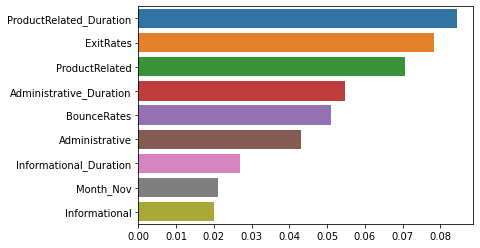

In [135]:
sns.barplot(y=importances.index, x=importances, orient="h")

Видим что более менее важными признаками являются время проведенное на страницах относящихся к товарам и процент всех просмотров страницы, которые были последними в сессии

### **Вывод**


**Точность классификатора kNN:**

- 1 сосед:
  - Train accuracy = 100%
  - Test accuracy = 84.23%

- 2 соседа: 
  - Train accuracy = 91.42% 
  - Test accuracy = 86.78%

- 14 соседей: 
  - Train accuracy = 88.31%
  - Test accuracy = 88.05%

- 15 соседей:
  - Train accuracy = 88.42%
  - Test accuracy = 88.11%

**Точность Random Forest:**

- Train accuracy = 100%
- Test accuracy = 89.68%